In [29]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [30]:

def map_features(X):
    result = list()
    for k in range(X.shape[0] if len(X.shape) == 2 else 1):
        vec = list(X[k, :] if len(X.shape) == 2 else X)
        for i in range(2, 7):
            for j in range(i + 1):
                vec.append(vec[1] ** j * vec[2] ** (i - j))
        result.append(vec)
    return np.array(result)

In [31]:
def logistic(z):
    result = 1 / (1 + (np.e ** (-z)))
    return result

In [32]:
def compute_cost_reg(X, y, theta, lamb):
    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    cost = (sum(y * (np.log(logistic(X @ theta))) + (1 - y) * np.log(1 - logistic(X @ theta))) / (-1 * m)) + (lamb * sum(theta**2))
    return cost

In [33]:
def compute_cost_grad_reg(X, y, theta, lamb):
    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    grad = (((logistic(X @ theta) - y) @ X) / m) + (2 * lamb * theta)
    return np.array(grad)

In [34]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

logistic(0) = 0.5 (должно быть 0.5)
logistic(-10) = 4.539786870243442e-05 (должно быть ~0)
logistic(10) = 0.9999546021312976 (должно быть ~1)


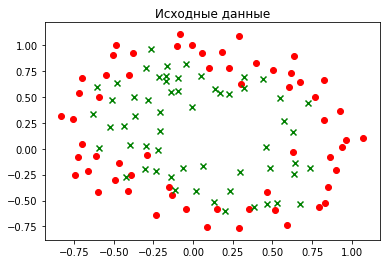

In [39]:
X, y = load_data('lab2data2.txt')

X = map_features(X)

print(f'logistic(0) = {logistic(np.array(0))} (должно быть 0.5)\n'
      f'logistic(-10) = {logistic(np.array(-10))} (должно быть ~0)\n'
      f'logistic(10) = {logistic(np.array(10))} (должно быть ~1)')

plt.title('Исходные данные')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()

In [40]:
lamb = 0.005
init_theta = np.zeros((X.shape[1], 1))
cost0 = compute_cost_reg(X, y, init_theta, lamb)
print(f'Функция стоимости при начальном theta = {cost0[0]}')

opt_theta_obj = minimize(lambda th: compute_cost_reg(X, y, th, lamb), init_theta,
                         method='CG',
                         jac=lambda th: compute_cost_grad_reg(X, y, th, lamb),
                         options={'gtol': 1e-5, 'maxiter': 1500, 'disp': False})


print('Минимизация функции стоимости ' + ('прошла успешно.' if opt_theta_obj.success else 'не удалась.'))
opt_theta = opt_theta_obj.x

opt_cost = compute_cost_reg(X, y, opt_theta, lamb)
print(f'Функция стоимости при оптимальном theta = {opt_cost}' )

Функция стоимости при начальном theta = 0.6931471805599461
Минимизация функции стоимости прошла успешно.
Функция стоимости при оптимальном theta = 0.5461213643702922


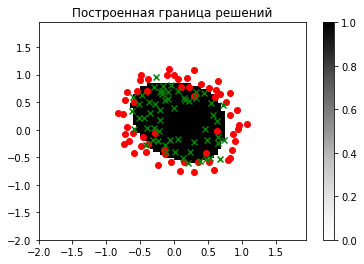

In [41]:
hm = np.zeros((80, 80))
for i in range(80):
    for j in range(80):
        hm[i, j] = round(logistic(opt_theta @ map_features(np.array([1, j / 20 - 2, i / 20 - 2])).transpose())[0])
c = plt.pcolor(np.arange(-2, 2, 0.05), np.arange(-2, 2, 0.05), hm, cmap='Greys')
plt.colorbar(c)

plt.title('Построенная граница решений')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x')
plt.show()